In [ ]:
import turicreate as tc


In [ ]:
# Load the data
imagesSFrame = tc.image_analysis.load_images('workspace/images/all/')

In [ ]:
annotations = tc.SFrame.read_csv('workspace/annotations/all_labels.csv')

Finished parsing file /Volumes/GoogleDrive/My Drive/projects/ML/object_detection_tf2/workspace/annotations/all_labels.csv

Parsing completed. Parsed 100 lines in 0.030142 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,list]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Volumes/GoogleDrive/My Drive/projects/ML/object_detection_tf2/workspace/annotations/all_labels.csv

Parsing completed. Parsed 111 lines in 0.010763 secs.

In [ ]:
annotations


Columns:
	path	str
	annotations	list

Rows: 111

Data:
+-------------------------------+-------------------------------+
|              path             |          annotations          |
+-------------------------------+-------------------------------+
| /Volumes/GoogleDrive/My Dr... | [{'label': 'good', 'coordi... |
| /Volumes/GoogleDrive/My Dr... | [{'label': 'bad', 'coordin... |
| /Volumes/GoogleDrive/My Dr... | [{'label': 'bad', 'coordin... |
| /Volumes/GoogleDrive/My Dr... | [{'label': 'good', 'coordi... |
| /Volumes/GoogleDrive/My Dr... | [{'label': 'bad', 'coordin... |
| /Volumes/GoogleDrive/My Dr... | [{'label': 'bad', 'coordin... |
| /Volumes/GoogleDrive/My Dr... | [{'label': 'bad', 'coordin... |
| /Volumes/GoogleDrive/My Dr... | [{'label': 'good', 'coordi... |
| /Volumes/GoogleDrive/My Dr... | [{'label': 'bad', 'coordin... |
| /Volumes/GoogleDrive/My Dr... | [{'label': 'bad', 'coordin... |
+-------------------------------+-------------------------------+
[111 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [ ]:
combinedSFrame = imagesSFrame.join(annotations)


In [ ]:
# Make a train-test split
train_data, test_data = combinedSFrame.random_split(0.8)



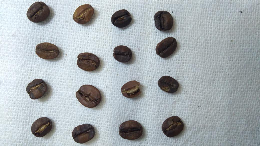
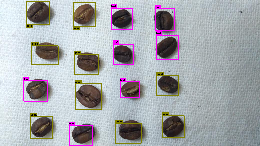
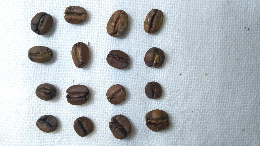
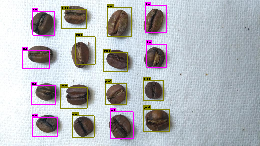
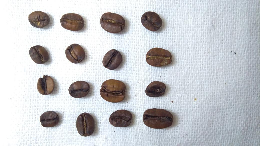
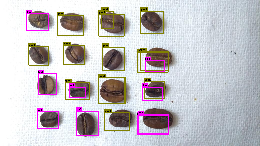
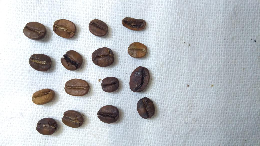
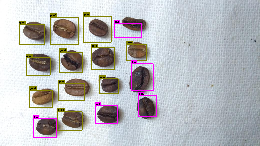
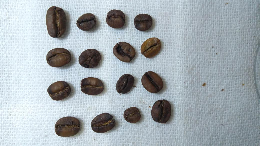
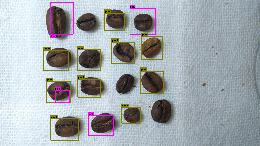

In [ ]:
train_data['image_with_ground_truth'] = \
    tc.object_detector.util.draw_bounding_boxes(train_data['image'], train_data['annotations'])
train_data.head(5).explore()

In [ ]:
# Create a model
model = tc.object_detector.create(dataset=train_data, feature='image', annotations='annotations', verbose=False)


In [ ]:
# Making predictions
images = []
for i in test_data['path']:
    images.append(tc.Image(i))

In [ ]:
test = tc.SFrame({'image': images})
test['predictions'] = model.predict(dataset=test, confidence_threshold=0.5, iou_threshold=0)



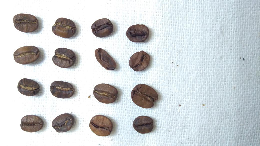
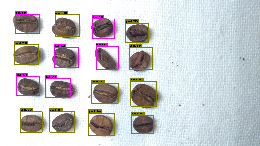
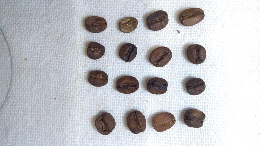
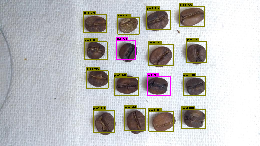
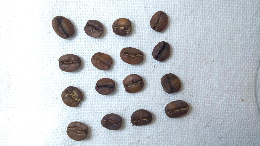
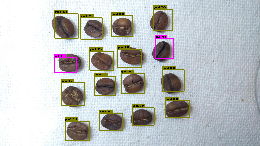
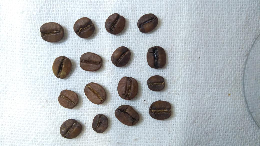
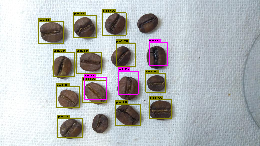
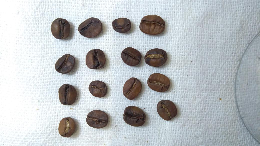
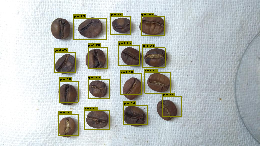
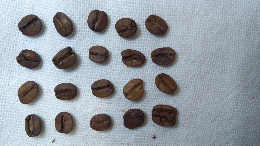
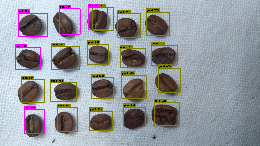
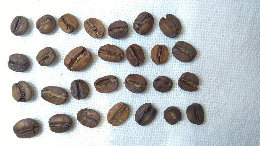
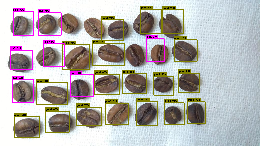
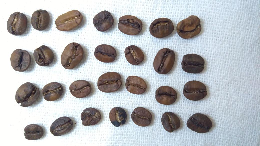
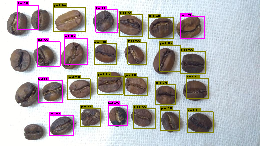
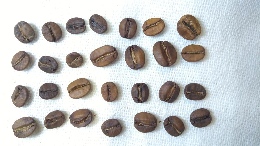
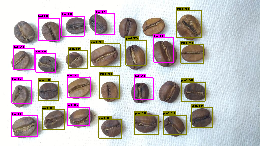
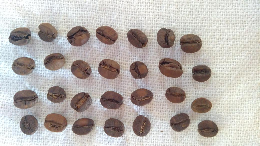
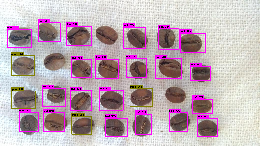
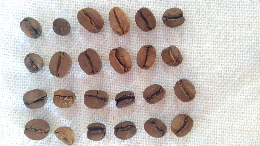
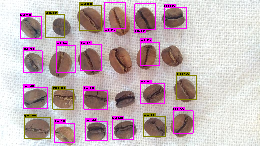
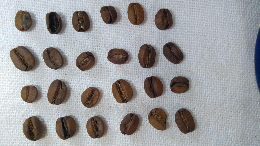
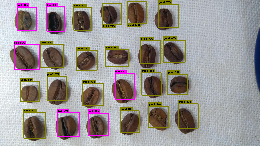
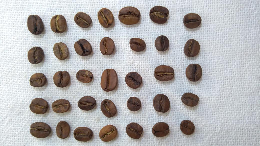
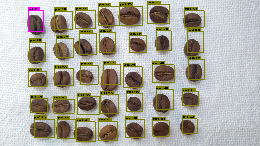
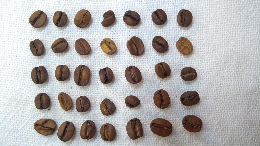
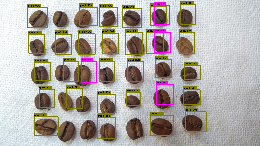
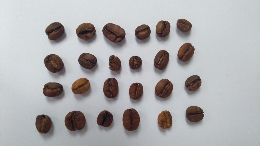
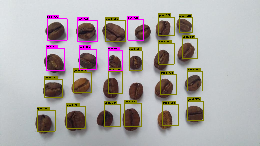
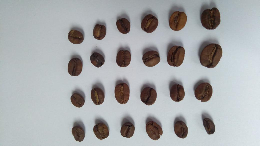
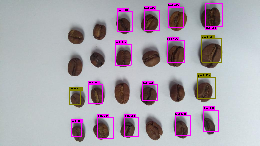
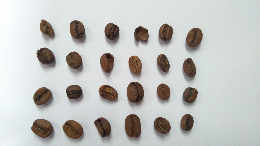
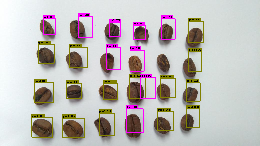
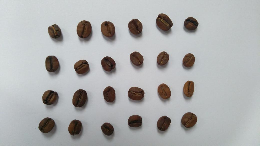
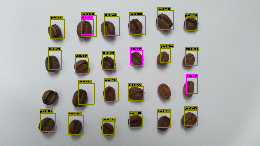
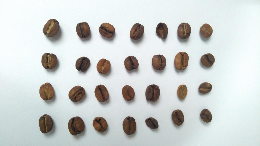
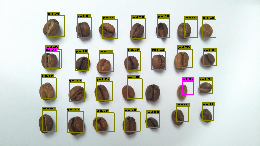
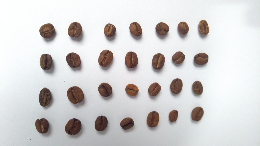
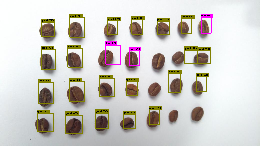
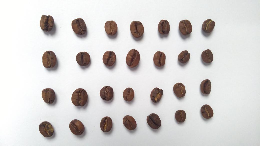
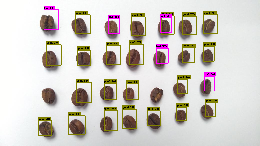
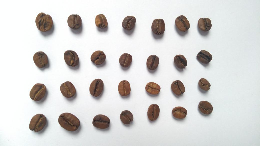
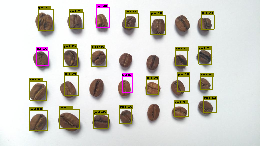
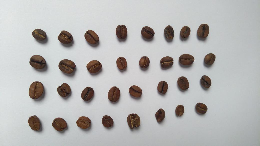
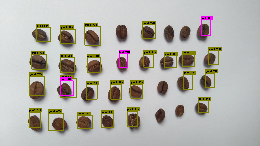
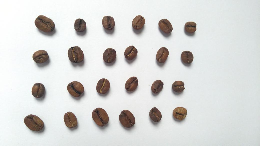
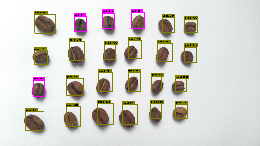
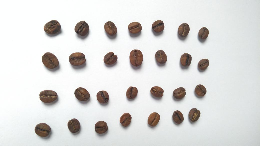
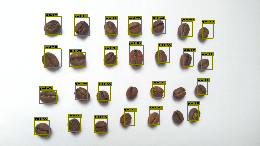

In [ ]:
test['image_with_predictions'] = \
    tc.object_detector.util.draw_bounding_boxes(test['image'], test['predictions'])
test[['image', 'image_with_predictions']].explore()


In [ ]:
# Save predictions to an SArray
predictions = model.predict(test_data)

In [ ]:
# Evaluate the model and save the results into a dictionary
metrics = model.evaluate(test_data)

In [ ]:
# Save the model for later use in Turi Create
model.save('coffee.model')

In [ ]:
# Export for use in Core ML
model.export_coreml('coffee.mlmodel')


In [ ]:
model.evaluate(test_data)

In [ ]:

model

Class                                    : ObjectDetector

Schema
------
Model                                    : darknet-yolo
Number of classes                        : 2
Input image shape                        : [3, 416, 416]

Training summary
----------------
Training time                            : 1h 30m
Training epochs                          : 2604
Training iterations                      : 7000
Number of examples (images)              : 86
Number of bounding boxes (instances)     : 2173
Final loss (specific to model)           : 4.5343